In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# Read the multiple sheets from the excel fie
crash = pd.read_excel('Resources/Crash_Qtr01_2016.xlsx', sheet_name='CRASH')
crashdf = pd.DataFrame(crash)

crashdf.head()

,LIGHT_CODE,COUNTY_NO,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,...,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE
0,1.0,1,0.0,0.0,17,4.00,NaN,1.0,4.0,5.0,...,NATIONAL FREEWAY,NaN,M,E,948.0,MD,AE,ROCKY GAP RD,39.685487,-78.663731
1,1.0,1,0.0,1.0,3,2.00,3.0,1.0,4.0,0.0,...,NATIONAL FREEWAY,NaN,M,E,0.0,UU,NaN,EXIT #50,39.694548,-78.646117
2,3.0,1,0.0,1.0,17,6.03,NaN,1.0,4.0,6.0,...,NATIONAL FREEWAY,NaN,M,E,948.0,MD,AD,PLEASANT VALLEY RD,39.692434,-78.655065
3,4.0,1,0.0,1.0,17,5.00,NaN,5.0,4.0,5.0,...,NATIONAL FREEWAY,NaN,F,W,0.0,UU,NaN,EXIT #52,39.704880,-78.626501
4,1.0,1,0.0,1.0,17,2.00,NaN,1.0,4.0,11.0,...,NATIONAL FREEWAY,NaN,M,E,144.0,MD,NaN,NATIONAL PIKE,39.712112,-78.617912


In [3]:
person = pd.read_excel('Resources/Crash_Qtr01_2016.xlsx', sheet_name='CIRCUM_PERSON')
vehicle = pd.read_excel('Resources/Crash_Qtr01_2016.xlsx', sheet_name='CIRCUM_VEHICLE')
road = pd.read_excel('Resources/Crash_Qtr01_2016.xlsx', sheet_name='CIRCUM_ROAD')
weather = pd.read_excel('Resources/Crash_Qtr01_2016.xlsx', sheet_name='CIRCUM_WEATHER')

In [11]:
crashdf = crashdf.filter(['REPORT_NO', 'COLLISION_TYPE_CODE'], axis = 1)
crashdf = crashdf.loc[crashdf["COLLISION_TYPE_CODE"] != 00]
crashdf = crashdf.loc[crashdf["COLLISION_TYPE_CODE"] != 88]
crashdf = crashdf.loc[crashdf["COLLISION_TYPE_CODE"] != 99]

persondf = pd.DataFrame(person)
#persondf = persondf.filter(['REPORT_NO', 'CONTRIB_CODE', 'PERSON_ID'], axis = 1)

persondf = persondf.filter(['REPORT_NO', 'CONTRIB_CODE'], axis = 1)
persondf = persondf.rename(columns={'CONTRIB_CODE': 'PERSON_CODE'})

persondf.head()
#crashdf.head()

,REPORT_NO,PERSON_CODE
0,AE4981000P,7.0
1,CB5873000L,0.0
2,MSP6495005B,6.0
3,MCP3010000G,0.0
4,ZR03090015,8.0


In [6]:
vehicledf = pd.DataFrame(vehicle)
vehicledf = vehicledf.filter(['REPORT_NO', 'CONTRIB_CODE', 'VEHICLE_ID'], axis = 1)

vehicledf = vehicledf.filter(['REPORT_NO', 'CONTRIB_CODE'], axis = 1)
vehicledf = vehicledf.rename(columns={'CONTRIB_CODE': 'VEHICLE_CODE'})

vehicledf.head()


,REPORT_NO,VEHICLE_CODE
0,AE3846000H,0.0
1,AE4981000P,0.0
2,AE4981000P,0.0
3,ADI945001C,0.0
4,CB5873000L,0.0


In [7]:
roaddf = pd.DataFrame(road)

roaddf = roaddf.filter(['REPORT_NO', 'CONTRIB_CODE'], axis = 1)
roaddf = roaddf.rename(columns={'CONTRIB_CODE': 'ROAD_CODE'})

roaddf.head()

,REPORT_NO,ROAD_CODE
0,AE3846000H,61.0
1,ADG3450026,0.0
2,ADC063001Y,0.0
3,AE4981000P,0.0
4,ADI945001C,0.0


In [8]:
weatherdf = pd.DataFrame(weather)

weatherdf = weatherdf.filter(['REPORT_NO', 'CONTRIB_CODE'], axis = 1)
weatherdf = weatherdf.rename(columns={'CONTRIB_CODE': 'WEATHER_CODE'})

weatherdf.head()

,REPORT_NO,WEATHER_CODE
0,AE3846000H,45.0
1,ADG3450026,0.0
2,MSP65850021,0.0
3,ADC063001Y,47.0
4,AE4981000P,0.0


In [12]:
data1 = crashdf.merge(persondf, how='inner', on = 'REPORT_NO')
data2 = data1.merge(vehicledf, how='inner', on = 'REPORT_NO')
data3 = data2.merge(roaddf, how='inner', on = 'REPORT_NO')
data = data3.merge(weatherdf, how='inner', on = 'REPORT_NO')

data.head()

,REPORT_NO,COLLISION_TYPE_CODE,PERSON_CODE,VEHICLE_CODE,ROAD_CODE,WEATHER_CODE
0,MSP25490014,17,21.00,0.0,62.0,42.0
1,MSP5513001V,3,60.88,0.0,0.0,0.0
2,MSP5513001V,3,60.88,0.0,0.0,0.0
3,MSP5513001V,3,7.00,0.0,0.0,0.0
4,MSP5513001V,3,7.00,0.0,0.0,0.0


In [112]:
# Write the  data to an excel file
data1.to_excel('Resources/Data1.xlsx')

In [13]:
#crashdf.count
data.dtypes
#data["REPORT_NO"] = data["REPORT_NO"].astype("float")
#data["REPORT_NO"] = data["REPORT_NO"].astype("float")
#data["REPORT_NO"] = data["REPORT_NO"].astype("float")
#data["REPORT_NO"] = data["REPORT_NO"].astype("float")

REPORT_NO               object
COLLISION_TYPE_CODE      int64
PERSON_CODE            float64
VEHICLE_CODE           float64
ROAD_CODE              float64
WEATHER_CODE           float64
dtype: object

In [42]:
#variables = ['PERSON_CODE', 'ROAD_CODE', 'WEATHER_CODE', 'VEHICLE_CODE']
variables = ['ROAD_CODE']
X = data[variables]
y = data['COLLISION_TYPE_CODE']
#X = data.drop(['COLLISION_TYPE_CODE', 'REPORT_NO'],axis=1)
#X = data.drop(['COLLISION_TYPE_CODE', 'REPORT_NO', 'REPORT_TYPE','ACC_DATE', 'ACC_TIME','LOC_CODE', 'SIGNAL_FLAG',
#              'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'ROUTE_TYPE_CODE','RTE_SUFFIX','LOGMILE_DIR_FLAG',
#              'MAINROAD_NAME', 'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG','REFERENCE_TYPE_CODE','REFERENCE_SUFFIX', 
#               'REFERENCE_ROAD_NAME'],axis=1)

#X = data1['PERSON_CODE']
print(X.shape, y.shape)



(78484, 1) (78484,)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
classifier.fit(X_train, y_train)

C:\Users\uali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.42335592817219647
Testing Data Score: 0.42332195097089853


In [29]:
print(classifier.intercept_)
print(classifier.coef_)
parameters = zip(variables, classifier.coef_)
print(parameters)

[-3.62339857 -2.50936086 -0.20937374 -4.99350556 -4.88947756 -4.00235646
 -2.32172182 -3.45204936 -3.33050929 -5.12359302 -1.39516565 -5.27751056
 -4.78069    -5.51781273 -6.01699442 -2.79963138]
[[ 4.72047839e-03  6.65273958e-03  1.67711317e-03 -4.82064354e-03]
 [-1.46422764e-02 -1.86469899e-03 -4.56872340e-03 -9.81840619e-03]
 [-2.37107460e-03 -3.43593269e-03 -2.54988312e-03 -1.17932268e-03]
 [-3.90267973e-03  6.85060831e-04  1.13433953e-02 -1.15924095e-02]
 [-2.40052694e-03  8.04075471e-03  1.07424792e-03 -4.94699255e-03]
 [ 2.73235469e-03  3.43052699e-03 -4.77246982e-03 -8.27151664e-03]
 [ 2.38081653e-03  3.65866443e-04 -1.42342140e-03 -9.82247629e-03]
 [ 1.18519078e-03 -3.67126611e-03  3.46082159e-03 -1.71326257e-02]
 [ 5.24113595e-05 -7.49596531e-03 -4.44424983e-04 -9.18973607e-03]
 [-2.73979003e-02  1.06415403e-02 -4.14054151e-02 -1.24279320e-01]
 [-1.18593022e-02 -5.09713720e-04 -3.51559087e-03 -1.15718447e-02]
 [-1.11424999e-02  1.73530255e-03  7.48619120e-03 -2.83632953e-02]


In [32]:
from sklearn.metrics import confusion_matrix
predictions = classifier.predict(X_test)

confusion_matrix(y_test, predictions)

array([[   0,    0,  599,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   15],
       [   0,    0, 1185,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   17],
       [   0,    0, 8204,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  102],
       [   0,    0,  136,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    2],
       [   0,    0,  156,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    8],
       [   0,    0,  361,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    7],
       [   0,    0, 1745,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   39],
       [   0,    0,  576,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   13],
       [   0,    0,  609,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

ValueError: x and y must be the same size

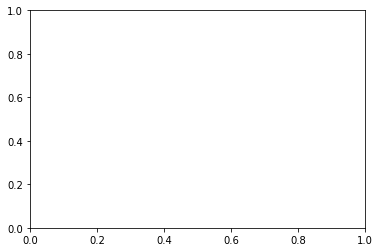

In [31]:

plt.scatter(X_test, y_test,  color='black')


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

sorted(zip(rf.feature_importances_, variables), reverse=True)


[(0.8027616085686651, 'PERSON_CODE'),
 (0.08489879902277236, 'ROAD_CODE'),
 (0.0725737069922274, 'WEATHER_CODE'),
 (0.039765885416335155, 'VEHICLE_CODE')]